In [1]:
import os
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

def count_lines(f):
    line_count = 0
    with open(f, 'r') as fh:
        for line in fh:
            line_count += 1
    return line_count



SUSIE_LIFTOVER_SUMMARY = '../work/ancestry-specific-finemapping/lift-susie/results/susie-liftover-summary/summary.txt'
MANIFEST_FILES = glob.glob('../work/selected-traits/*')
POSTMERGE_FILES = glob.glob('../work/ancestry-specific-finemapping/find-regions-to-finemap/results/regions-to-finemap-size-filter/*')
GWAS_CS_FILES = '../work/ancestry-specific-finemapping/lift-susie/results/susie-cs-and-convergence/gwas.cs.txt'
ALL_WINDOWS_LIFTED = '../work/ancestry-specific-finemapping/lift-susie/results/lifted-regions/regions-hg38.bed'
PREFIX = 'summarize-panukbb-finemapping.'



liftover = pd.read_csv(ALL_WINDOWS_LIFTED, sep='\t', header=None, names=['chrom', 'start', 'end', 'hg19'])
liftover['hg38'] = liftover[['chrom', 'start', 'end']].astype(str).apply(lambda x: ':'.join(x), axis=1)
hg19_to_hg38 = dict(zip(liftover.hg19.str.replace(':', '_'), liftover.hg38.str.replace(':', '_')))


In [2]:

susie_summary = pd.read_csv(SUSIE_LIFTOVER_SUMMARY, sep='\t')
susie_summary['trait_id'] = susie_summary.rda.map(os.path.basename).str.split('___', expand=True)[0]
susie_summary['ancestry'] = susie_summary.rda.map(os.path.basename).str.split('___', expand=True)[1]
susie_summary['hg19_region'] = susie_summary['hg19_region'].str.replace(':', '_')
susie_summary['hg38_region'] = susie_summary['hg38_region'].str.replace(':', '_')
susie_summary['finemapped'] = 1
susie_summary['finemapped_and_lifted'] = (~susie_summary.SNPS_LIFTED.isnull()).astype(int)
susie_summary.head()


,rda,hg19_region,hg38_region,rda_hg38,REASON_FAIL,TOTAL_SNPS,SNPS_LIFTED,trait_id,ancestry,finemapped,finemapped_and_lifted
0,rda/biomarkers-30600-both_sexes-irnt___EUR___1...,chr12_4134843_4634844,chr12_4025677_4525678,biomarkers-30600-both_sexes-irnt___EUR___chr12...,NaN,3656.0,3656.0,biomarkers-30600-both_sexes-irnt,EUR,1,1
1,rda/biomarkers-30600-both_sexes-irnt___EUR___3...,chr3_24270282_24770283,chr3_24228791_24728792,biomarkers-30600-both_sexes-irnt___EUR___chr3_...,NaN,4816.0,4816.0,biomarkers-30600-both_sexes-irnt,EUR,1,1
2,rda/biomarkers-30600-both_sexes-irnt___EUR___7...,chr7_17037268_17537269,chr7_16997644_17497645,biomarkers-30600-both_sexes-irnt___EUR___chr7_...,NaN,4535.0,4535.0,biomarkers-30600-both_sexes-irnt,EUR,1,1
3,rda/biomarkers-30620-both_sexes-irnt___EUR___1...,chr12_11541684_12041685,chr12_11388750_11888751,biomarkers-30620-both_sexes-irnt___EUR___chr12...,NaN,3582.0,3582.0,biomarkers-30620-both_sexes-irnt,EUR,1,1
4,rda/biomarkers-30620-both_sexes-irnt___EUR___1...,chr12_4134843_4634844,chr12_4025677_4525678,biomarkers-30620-both_sexes-irnt___EUR___chr12...,NaN,3687.0,3687.0,biomarkers-30620-both_sexes-irnt,EUR,1,1


In [3]:
manifest = pd.concat([pd.read_csv(f, sep='\t').assign(ancestry=os.path.basename(f).split('.')[1]) for f in MANIFEST_FILES])
manifest.head()

,trait_type,phenocode,coding,description,description_more,coding_description,category,n_cases_AFR,n_controls_AFR,rhemc_25bin_50rv_h2_observed_AFR,...,ancestry,modifier,n_cases_EUR,n_controls_EUR,sldsc_25bin_h2_observed_EUR,sldsc_25bin_h2_observed_se_EUR,sldsc_25bin_h2_liability_EUR,sldsc_25bin_h2_liability_se_EUR,sldsc_25bin_h2_z_EUR,lambda_gc_EUR
0,biomarkers,30620,NaN,Alanine aminotransferase,NaN,NaN,Biological samples > Assay results > Blood ass...,6214.0,NaN,0.33835,...,AFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,biomarkers,30870,NaN,Triglycerides,NaN,NaN,Biological samples > Assay results > Blood ass...,6211.0,NaN,0.31332,...,AFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,biomarkers,30890,NaN,Vitamin D,NaN,NaN,Biological samples > Assay results > Blood ass...,6046.0,NaN,0.42354,...,AFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,categorical,120,1.0,Birth weight known,Birth weight known This question was dropped...,Yes - pounds and ounces,UK Biobank Assessment Centre > Verbal intervie...,1715.0,4909.0,0.46767,...,AFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,categorical,120,9.0,Birth weight known,Birth weight known This question was dropped...,No,UK Biobank Assessment Centre > Verbal intervie...,4844.0,1780.0,0.47401,...,AFR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# determine how many windows were finemapped
postmerge_windows = pd.DataFrame([[f, os.path.basename(f).replace('.regions.txt', ''), count_lines(f)] for f in POSTMERGE_FILES], columns=['postmerge_file', 'trait_id', 'postmerge_windows'])
postmerge_windows[['trait_id','ancestry']] = postmerge_windows.trait_id.str.split('___', expand=True)
postmerge_windows.head()

,postmerge_file,trait_id,postmerge_windows,ancestry
0,../work/ancestry-specific-finemapping/find-reg...,categorical-20004-both_sexes-1479,0,AFR
1,../work/ancestry-specific-finemapping/find-reg...,biomarkers-30730-both_sexes-irnt,535,EUR
2,../work/ancestry-specific-finemapping/find-reg...,categorical-1428-both_sexes-3,4,EUR
3,../work/ancestry-specific-finemapping/find-reg...,biomarkers-30720-both_sexes-irnt,831,EUR
4,../work/ancestry-specific-finemapping/find-reg...,biomarkers-30760-both_sexes-irnt,657,EUR


In [5]:

postmerge_windows_bed = pd.concat([pd.read_csv(f, sep='\t', header=None, names=['chrom', 'start', 'end']).assign(trait_id=os.path.basename(f).replace('.regions.txt', '')) for f in postmerge_windows[postmerge_windows.postmerge_windows>0].postmerge_file])
postmerge_windows_bed[['trait_id','ancestry']] = postmerge_windows_bed.trait_id.str.split('___', expand=True)
postmerge_windows_bed['width'] = (postmerge_windows_bed.end - postmerge_windows_bed.start) - 1
postmerge_windows_bed['region'] = 'chr' + postmerge_windows_bed.chrom.astype(str) + '_' + postmerge_windows_bed.start.astype(str) + '_' + postmerge_windows_bed.end.astype(str)
postmerge_windows_bed.head()

,chrom,start,end,trait_id,ancestry,width,region
0,1,853541,1353542,biomarkers-30730-both_sexes-irnt,EUR,500000,chr1_853541_1353542
1,1,1925552,2425553,biomarkers-30730-both_sexes-irnt,EUR,500000,chr1_1925552_2425553
2,1,2473192,2973193,biomarkers-30730-both_sexes-irnt,EUR,500000,chr1_2473192_2973193
3,1,15662789,17005873,biomarkers-30730-both_sexes-irnt,EUR,1343083,chr1_15662789_17005873
4,1,17135654,17635655,biomarkers-30730-both_sexes-irnt,EUR,500000,chr1_17135654_17635655


In [6]:
all_regions_to_consider_for_finemapping = postmerge_windows_bed[['trait_id', 'ancestry', 'region', 'width']].rename(columns={'region': 'hg19_region'})
all_regions_to_consider_for_finemapping['hg38_region'] = all_regions_to_consider_for_finemapping.hg19_region.map(hg19_to_hg38)
all_regions_to_consider_for_finemapping = all_regions_to_consider_for_finemapping.merge(susie_summary[['hg19_region', 'finemapped', 'finemapped_and_lifted', 'trait_id', 'ancestry', 'TOTAL_SNPS', 'SNPS_LIFTED']], how='left')
all_regions_to_consider_for_finemapping.finemapped = all_regions_to_consider_for_finemapping.finemapped.fillna(0).astype(int)
all_regions_to_consider_for_finemapping.finemapped_and_lifted = all_regions_to_consider_for_finemapping.finemapped_and_lifted.fillna(0).astype(int)
all_regions_to_consider_for_finemapping.head()

,trait_id,ancestry,hg19_region,width,hg38_region,finemapped,finemapped_and_lifted,TOTAL_SNPS,SNPS_LIFTED
0,biomarkers-30730-both_sexes-irnt,EUR,chr1_853541_1353542,500000,chr1_918161_1418162,1,1,4831.0,4831.0
1,biomarkers-30730-both_sexes-irnt,EUR,chr1_1925552_2425553,500000,chr1_1994113_2494114,1,1,4645.0,4645.0
2,biomarkers-30730-both_sexes-irnt,EUR,chr1_2473192_2973193,500000,NaN,1,0,NaN,NaN
3,biomarkers-30730-both_sexes-irnt,EUR,chr1_15662789_17005873,1343083,chr1_15336293_16679378,1,1,10679.0,10679.0
4,biomarkers-30730-both_sexes-irnt,EUR,chr1_17135654_17635655,500000,NaN,1,0,NaN,NaN


In [7]:
gwas_cs = pd.read_csv(GWAS_CS_FILES, sep='\t', header=None, names=['variant', 'cs', 'pip', 'f'])
gwas_cs.f = gwas_cs.f.map(os.path.basename).str.replace('.rda', '', regex=False)
gwas_cs[['trait_id', 'ancestry', 'hg38_region']] = gwas_cs.f.str.split('___', expand=True)
gwas_cs['finemapped_and_lifted_and_converged'] = 1
gwas_cs_counts = gwas_cs.groupby(['trait_id', 'ancestry', 'hg38_region', 'finemapped_and_lifted_and_converged']).cs.nunique().rename('n_cs').reset_index()
gwas_cs_counts.head()

,trait_id,ancestry,hg38_region,finemapped_and_lifted_and_converged,n_cs
0,biomarkers-30600-both_sexes-irnt,EUR,chr10_112772821_113272822,1,1
1,biomarkers-30600-both_sexes-irnt,EUR,chr10_21038767_22106759,1,1
2,biomarkers-30600-both_sexes-irnt,EUR,chr10_48805155_49305156,1,1
3,biomarkers-30600-both_sexes-irnt,EUR,chr10_59656127_60156128,1,1
4,biomarkers-30600-both_sexes-irnt,EUR,chr10_62934238_63784100,1,1


In [8]:

all_regions_to_consider_for_finemapping = all_regions_to_consider_for_finemapping.merge(gwas_cs_counts, how='left')
all_regions_to_consider_for_finemapping.finemapped_and_lifted_and_converged = all_regions_to_consider_for_finemapping.finemapped_and_lifted_and_converged.fillna(0).astype(int)
all_regions_to_consider_for_finemapping = all_regions_to_consider_for_finemapping.rename(columns={'TOTAL_SNPS': 'snps_finemapped', 'SNPS_LIFTED': 'snps_finemapped_and_lifted'})
#all_regions_to_consider_for_finemapping.to_csv(sys.stdout, sep='\t', index=False)
all_regions_to_consider_for_finemapping.head()



,trait_id,ancestry,hg19_region,width,hg38_region,finemapped,finemapped_and_lifted,snps_finemapped,snps_finemapped_and_lifted,finemapped_and_lifted_and_converged,n_cs
0,biomarkers-30730-both_sexes-irnt,EUR,chr1_853541_1353542,500000,chr1_918161_1418162,1,1,4831.0,4831.0,1,1.0
1,biomarkers-30730-both_sexes-irnt,EUR,chr1_1925552_2425553,500000,chr1_1994113_2494114,1,1,4645.0,4645.0,1,1.0
2,biomarkers-30730-both_sexes-irnt,EUR,chr1_2473192_2973193,500000,NaN,1,0,NaN,NaN,0,NaN
3,biomarkers-30730-both_sexes-irnt,EUR,chr1_15662789_17005873,1343083,chr1_15336293_16679378,1,1,10679.0,10679.0,1,2.0
4,biomarkers-30730-both_sexes-irnt,EUR,chr1_17135654_17635655,500000,NaN,1,0,NaN,NaN,0,NaN


In [9]:
print(len(manifest))
manifest = manifest.merge(postmerge_windows[['trait_id','ancestry', 'postmerge_windows']].rename(columns={'postmerge_windows': 'windows_attempted_to_finemap'}), how='left')
print(len(manifest))

204
204


In [10]:
print(len(manifest))
manifest = manifest.merge(all_regions_to_consider_for_finemapping[all_regions_to_consider_for_finemapping.finemapped_and_lifted==1].groupby(['trait_id', 'ancestry']).size().rename('windows_finemapped_and_lifted').reset_index(), how='left')
manifest.windows_finemapped_and_lifted = manifest.windows_finemapped_and_lifted.fillna(0).astype(int)
print(len(manifest))

204
204


In [11]:
number_regions_w_at_least_one_cs = gwas_cs_counts.groupby(['trait_id', 'ancestry']).n_cs.apply(lambda x: sum(x>0)).rename('n_windows_w_at_least_one_cs').reset_index()
total_cs = gwas_cs_counts.groupby(['trait_id', 'ancestry']).n_cs.sum().rename('total_cs').reset_index()


print(len(manifest))
manifest = manifest.merge(number_regions_w_at_least_one_cs, how='left')
manifest.n_windows_w_at_least_one_cs = manifest.n_windows_w_at_least_one_cs.fillna(0).astype(int)

manifest = manifest.merge(total_cs, how='left')
manifest.total_cs = manifest.total_cs.fillna(0).astype(int)
print(len(manifest))


204
204


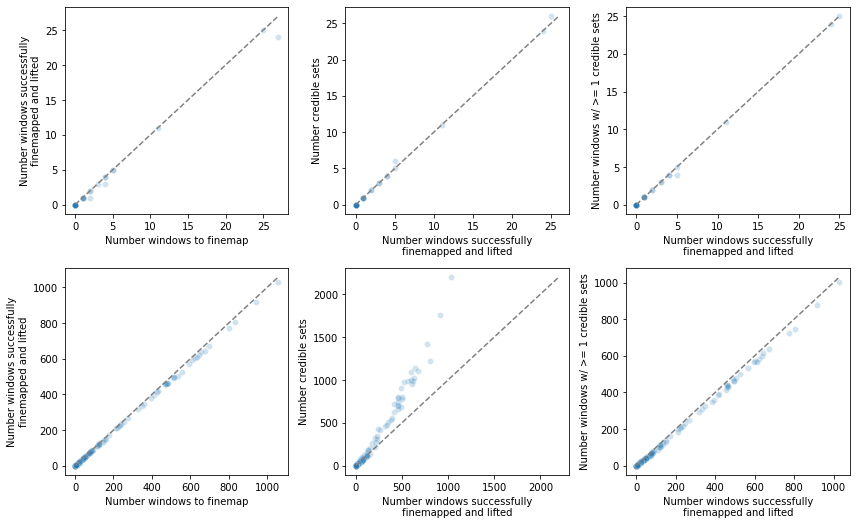

In [12]:
# # show, for each trait, how many windows should have been finemapped and how many were succesfully fine-mapped and lifted
ANCESTRIES = manifest.ancestry.unique()
fig, axs = plt.subplots(ncols=3, nrows=len(ANCESTRIES), figsize=(3*4, len(ANCESTRIES)*3.7), squeeze=False)

for idx, (ancestry, df) in enumerate(manifest.groupby('ancestry')):
    ax = axs[idx,0]
    MAX = df.windows_attempted_to_finemap.max()
    ax.plot([0, MAX], [0, MAX], color='grey', ls='--')
    sns.scatterplot(x='windows_attempted_to_finemap', y='windows_finemapped_and_lifted', ax=ax, alpha=0.2, data=df)
    ax.set_xlabel('Number windows to finemap')
    ax.set_ylabel('Number windows successfully\nfinemapped and lifted')

    ax = axs[idx,1]
    MAX = df[['windows_finemapped_and_lifted', 'total_cs']].max().max()
    ax.plot([0, MAX], [0, MAX], color='grey', ls='--')
    sns.scatterplot(x='windows_finemapped_and_lifted', y='total_cs', ax=ax, alpha=0.2, data=df)
    ax.set_xlabel('Number windows successfully\nfinemapped and lifted')
    ax.set_ylabel('Number credible sets')

    ax = axs[idx,2]
    MAX = df[['windows_finemapped_and_lifted', 'n_windows_w_at_least_one_cs']].max().max()
    ax.plot([0, MAX], [0, MAX], color='grey', ls='--')
    sns.scatterplot(x='windows_finemapped_and_lifted', y='n_windows_w_at_least_one_cs', ax=ax, alpha=0.2, data=df)
    ax.set_xlabel('Number windows successfully\nfinemapped and lifted')
    ax.set_ylabel('Number windows w/ >= 1 credible sets')

fig.tight_layout()
fig.savefig(f'figures/{PREFIX}finemapping-summary.png', dpi=300, facecolor='white')

In [13]:
cs_per_trait_per_ancestry = gwas_cs.groupby(['trait_id', 'ancestry', 'hg38_region']).cs.nunique().reset_index().groupby(['trait_id', 'ancestry']).cs.sum().reset_index()
cs_per_trait_per_ancestry = manifest[['trait_id', 'description', 'description_more', 'coding_description', 'ancestry', 'windows_attempted_to_finemap']].merge(cs_per_trait_per_ancestry, how='left')
cs_per_trait_per_ancestry['considered_for_finemapping'] = 1
cs_per_trait_per_ancestry.cs = cs_per_trait_per_ancestry.cs.fillna(0).astype(int)
cs_per_trait_per_ancestry.head()

,trait_id,description,description_more,coding_description,ancestry,windows_attempted_to_finemap,cs,considered_for_finemapping
0,biomarkers-30620-both_sexes-irnt,Alanine aminotransferase,NaN,NaN,AFR,2,1,1
1,biomarkers-30870-both_sexes-irnt,Triglycerides,NaN,NaN,AFR,5,6,1
2,biomarkers-30890-both_sexes-irnt,Vitamin D,NaN,NaN,AFR,4,4,1
3,categorical-120-both_sexes-1,Birth weight known,Birth weight known This question was dropped...,Yes - pounds and ounces,AFR,1,1,1
4,categorical-120-both_sexes-9,Birth weight known,Birth weight known This question was dropped...,No,AFR,1,1,1


In [14]:
cs_per_trait_per_ancestry = cs_per_trait_per_ancestry.melt(id_vars=['trait_id', 'description', 'description_more', 'coding_description', 'ancestry'])
cs_per_trait_per_ancestry['variable'] = cs_per_trait_per_ancestry.variable + ' (' + cs_per_trait_per_ancestry.ancestry + ')'
cs_per_trait_per_ancestry = cs_per_trait_per_ancestry.pivot(index=['trait_id', 'description', 'description_more', 'coding_description'], columns='variable', values='value').reset_index()
cs_per_trait_per_ancestry.head()

variable,trait_id,description,description_more,coding_description,considered_for_finemapping (AFR),considered_for_finemapping (EUR),cs (AFR),cs (EUR),windows_attempted_to_finemap (AFR),windows_attempted_to_finemap (EUR)
0,biomarkers-30600-both_sexes-irnt,Albumin,NaN,NaN,NaN,1.0,NaN,505.0,NaN,361.0
1,biomarkers-30610-both_sexes-irnt,Alkaline phosphatase,NaN,NaN,NaN,1.0,NaN,1004.0,NaN,626.0
2,biomarkers-30620-both_sexes-irnt,Alanine aminotransferase,NaN,NaN,1.0,1.0,1.0,474.0,2.0,346.0
3,biomarkers-30630-both_sexes-irnt,Apolipoprotein A,NaN,NaN,NaN,1.0,NaN,740.0,NaN,481.0
4,biomarkers-30640-both_sexes-irnt,Apolipoprotein B,NaN,NaN,NaN,1.0,NaN,425.0,NaN,254.0


In [15]:
cs_per_trait_per_ancestry = cs_per_trait_per_ancestry[['trait_id', 'description', 'description_more', 'coding_description', 'considered_for_finemapping (EUR)', 'windows_attempted_to_finemap (EUR)', 'cs (EUR)', 'considered_for_finemapping (AFR)', 'windows_attempted_to_finemap (AFR)', 'cs (AFR)']]
cs_per_trait_per_ancestry['considered_for_finemapping (EUR)'] = cs_per_trait_per_ancestry['considered_for_finemapping (EUR)'].fillna(0).astype(bool)
cs_per_trait_per_ancestry['considered_for_finemapping (AFR)'] = cs_per_trait_per_ancestry['considered_for_finemapping (AFR)'].fillna(0).astype(bool)
cs_per_trait_per_ancestry['windows_attempted_to_finemap (EUR)'] = cs_per_trait_per_ancestry['windows_attempted_to_finemap (EUR)'].fillna(0).astype(int)
cs_per_trait_per_ancestry['windows_attempted_to_finemap (AFR)'] = cs_per_trait_per_ancestry['windows_attempted_to_finemap (AFR)'].fillna(0).astype(int)
cs_per_trait_per_ancestry['cs (EUR)'] = cs_per_trait_per_ancestry['cs (EUR)'].fillna(0).astype(int)
cs_per_trait_per_ancestry['cs (AFR)'] = cs_per_trait_per_ancestry['cs (AFR)'].fillna(0).astype(int)
#cs_per_trait_per_ancestry[cs_per_trait_per_ancestry['considered_for_finemapping (AFR)']==False,['windows_attempted_to_finemap (AFR)', 'cs (AFR)']] = ''
cs_per_trait_per_ancestry.head()

variable,trait_id,description,description_more,coding_description,considered_for_finemapping (EUR),windows_attempted_to_finemap (EUR),cs (EUR),considered_for_finemapping (AFR),windows_attempted_to_finemap (AFR),cs (AFR)
0,biomarkers-30600-both_sexes-irnt,Albumin,NaN,NaN,True,361,505,False,0,0
1,biomarkers-30610-both_sexes-irnt,Alkaline phosphatase,NaN,NaN,True,626,1004,False,0,0
2,biomarkers-30620-both_sexes-irnt,Alanine aminotransferase,NaN,NaN,True,346,474,True,2,1
3,biomarkers-30630-both_sexes-irnt,Apolipoprotein A,NaN,NaN,True,481,740,False,0,0
4,biomarkers-30640-both_sexes-irnt,Apolipoprotein B,NaN,NaN,True,254,425,False,0,0


In [16]:
len(cs_per_trait_per_ancestry)

172

In [17]:
(cs_per_trait_per_ancestry['windows_attempted_to_finemap (EUR)']>0).value_counts()

True     166
False      6
Name: windows_attempted_to_finemap (EUR), dtype: int64

In [18]:
cs_per_trait_per_ancestry['cs (EUR)'].sum()

34107

In [19]:
(cs_per_trait_per_ancestry.filter(like='cs ', axis=1).max(axis=1)>0).sum()

164

In [20]:
cs_per_trait_per_ancestry.to_csv(f'tables/{PREFIX}finemapping-summary.csv', index=False)